In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
car=pd.read_csv('car data.csv')
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
car.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  

In [ ]:
car.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1

In [ ]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

<Axes: >

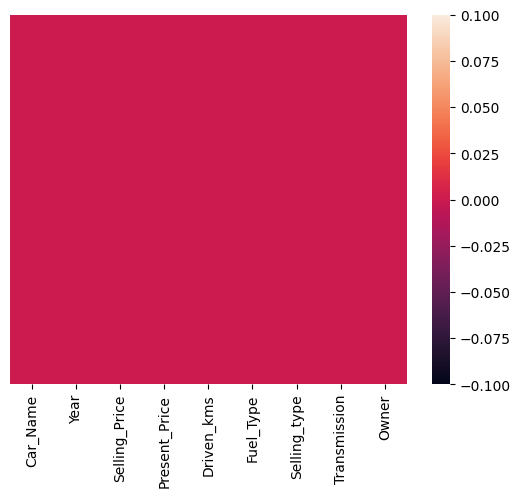

In [ ]:
sns.heatmap(car.isnull(),yticklabels=False)

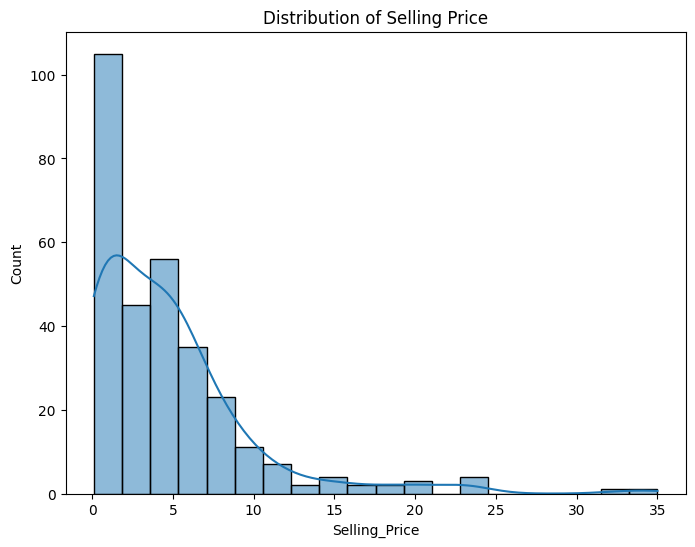

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=car['Selling_Price'], bins=20, kde=True)
plt.title('Distribution of Selling Price')
plt.show()

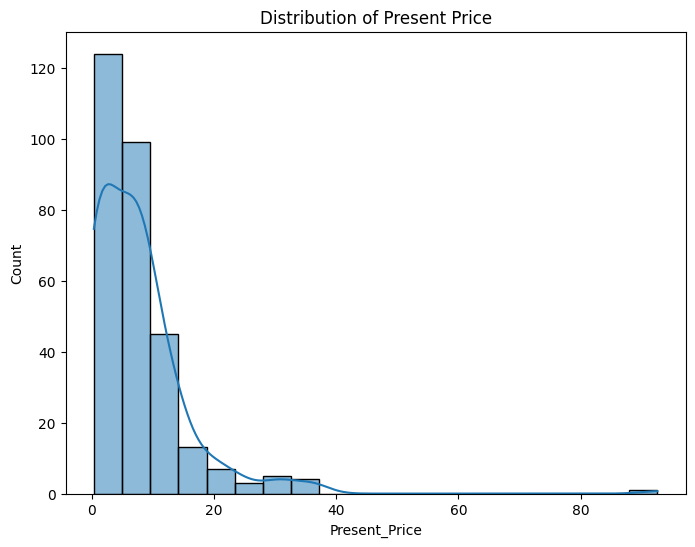

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=car['Present_Price'], bins=20, kde=True)
plt.title('Distribution of Present Price')
plt.show()

##Linear Regresssion

In [ ]:
X = car.drop('Selling_Price', axis=1)
y = car['Selling_Price']

In [ ]:
# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 2.0365174791085914
Mean Squared Error: 9.22109039307778
R-squared: 0.5997023481233722


In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df.tail()

,Actual Value,Predicted Value,Difference
234,5.5,4.591712,0.908288
296,9.5,8.916657,0.583343
281,2.1,0.058975,2.041025
285,7.4,6.626176,0.773824
182,0.3,3.668197,-3.368197


##Random Forest

In [ ]:
y = car['Selling_Price']
X = car.drop(['Car_Name', 'Selling_Price'], axis=1)
X = pd.get_dummies(X, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('R^2 Score:', r2_score(y_test, predictions))

Mean Absolute Error: 0.6227000000000007
Mean Squared Error: 0.8686501572131149
R^2 Score: 0.9622909435422405


In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':predictions,'Difference':y_test-predictions})
pred_df.tail()

,Actual Value,Predicted Value,Difference
234,5.5,5.0980,0.4020
296,9.5,9.0170,0.4830
281,2.1,2.7275,-0.6275
285,7.4,6.6175,0.7825
182,0.3,0.2439,0.0561


##SVM model

In [ ]:
X = car.drop('Selling_Price', axis=1)
y = car['Selling_Price']

In [ ]:
# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = SVR()
model.fit(X_train_scaled, y_train)

SVR()

In [ ]:
predictions = model.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('R^2 Score:', r2_score(y_test, predictions))

Mean Absolute Error: 1.735317545361119
Mean Squared Error: 10.763286751550204
R^2 Score: 0.5327539120151406


In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':predictions,'Difference':y_test-predictions})
pred_df.tail()

,Actual Value,Predicted Value,Difference
234,5.5,4.878395,0.621605
296,9.5,8.671707,0.828293
281,2.1,4.454661,-2.354661
285,7.4,6.090717,1.309283
182,0.3,0.383137,-0.083137
